buraya model eğitme kodları gelecek

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
Epoch 1/5
145/145 [==============================] - 141s 975ms/step - loss: 0.9983 - accuracy: 0.5050 - val_loss: 1.0809 - val_accuracy: 0.4991
Epoch 2/5
145/145 [==============================] - 141s 969ms/step - loss: 0.9972 - accuracy: 0.5039 - val_loss: 1.0809 - val_accuracy: 0.4991
Epoch 3/5
145/145 [==============================] - 141s 972ms/step - loss: 0.9970 - accuracy: 0.5039 - val_loss: 1.0809 - val_accuracy: 0.4991
Epoch 4/5
145/145 [==============================] - 140s 963ms/step - loss: 0.9959 - accuracy: 0.5045 - val_loss: 1.0809 - val_accuracy: 0.4991
Epoch 5/5
145/145 [==============================] - 140s 966ms/step - loss: 0.9943 - accuracy: 0.5041 - val_loss: 1.0809 - val_accuracy: 0.4991


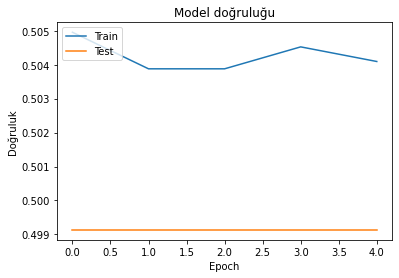

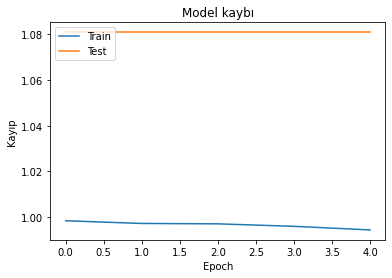

In [0]:
import tensorflow as tf
import keras
#from tf.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
from IPython.display import Image


train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

#train_dir = 'train'
#validation_dir = 'val'

#modeli transfer öğrenme ekleyelim
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

#We will use pre-trained weights as the model has been trained already on the Imagenet dataset. We ensure all the weights are non-trainable. We will only train the last few dense layers.
for layer in model.layers:
    layer.trainable=False

train_datagen=ImageDataGenerator(shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical')#,
                                                 #shuffle=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
 
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=32,
                                                              shuffle=False,
                                                              class_mode='categorical',
                                                              target_size=(224,224))
optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
#optimizer = tensorflow.keras.optimizers.Adam(lr=1e-4)
#optimizer = tensorflow.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tensorflow.keras.optimizers.Adadelta(lr=1.0, rho=0.95)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
steps_size_val=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                              validation_data=validation_generator,
                              validation_steps=steps_size_val,
                              steps_per_epoch=step_size_train,
                              epochs=5)

#model.save('/content/drive/My Drive/datasets/UcClass/modelNasNetMobileRMSpropE25.h5')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
